In [1]:
import pandas as pd
import numpy as np
import os
import io

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [2]:
import boto3
import sagemaker

In [24]:
s3_client = boto3.client('s3')
bucket_name='mvc-crashes'

In [25]:
obj_list=s3_client.list_objects(Bucket=bucket_name)

files=[]
for contents in obj_list['Contents']:
    files.append(contents['Key'])
    
print(files)

['crashes_by_street.csv']


In [26]:
file_name=files[0]

print(file_name)

crashes_by_street.csv


In [27]:
data_object = s3_client.get_object(Bucket=bucket_name, Key=file_name)
display(data_object)

{'ResponseMetadata': {'RequestId': '7ZFS0SFG0J1KEP1R',
  'HostId': 'UKHbo5+zI/mZoYQZe3O79yk3RQlS2jp6SdAy+HCeEY9sLa38y5DCrD24XvVtKC72IivOgOSfIIA=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'UKHbo5+zI/mZoYQZe3O79yk3RQlS2jp6SdAy+HCeEY9sLa38y5DCrD24XvVtKC72IivOgOSfIIA=',
   'x-amz-request-id': '7ZFS0SFG0J1KEP1R',
   'date': 'Mon, 13 Jul 2020 03:26:17 GMT',
   'last-modified': 'Mon, 13 Jul 2020 02:19:08 GMT',
   'etag': '"f952f6edfc8ce8f4287340bdbc37d241"',
   'accept-ranges': 'bytes',
   'content-type': 'text/csv',
   'content-length': '1661051',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'AcceptRanges': 'bytes',
 'LastModified': datetime.datetime(2020, 7, 13, 2, 19, 8, tzinfo=tzutc()),
 'ContentLength': 1661051,
 'ETag': '"f952f6edfc8ce8f4287340bdbc37d241"',
 'ContentType': 'text/csv',
 'Metadata': {},
 'Body': <botocore.response.StreamingBody at 0x7fe73c83d2b0>}

In [28]:
data_body = data_object["Body"].read()

In [29]:
data_stream = io.BytesIO(data_body)

streets_df = pd.read_csv(data_stream, header=0, delimiter=",") 
streets_df

,street_city,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,factor__driver_inattention_distraction,...,may,june,july,august,september,october,november,december,is_intersection,is_not_intersection
0,"100th Avenue, Queens, NY",97,2,3,0,4,0,90,2,41,...,18,16,26,21,16,17,21,24,202,18
1,"100th Drive, Queens, NY",4,0,0,0,1,0,3,0,3,...,0,0,1,1,3,0,0,4,13,4
2,"100th Road, Queens, NY",2,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,0,0,1,0
3,"100th Street, Kings, NY",8,0,2,0,1,0,5,0,7,...,10,3,10,6,6,8,3,6,0,82
4,"100th Street, Queens, NY",189,0,48,0,10,0,131,0,182,...,50,49,59,60,60,63,55,47,546,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,"Zoe Street, Richmond, NY",8,0,1,0,0,0,7,0,2,...,1,2,0,1,1,0,2,1,16,1
7986,"Zoller Road, Queens, NY",18,0,2,0,0,0,16,0,1,...,3,2,3,2,1,0,2,2,20,2
7987,"Zulette Avenue, Bronx, NY",28,0,0,0,1,0,27,0,12,...,10,10,16,11,12,18,9,12,128,15
7988,"Zwicky Avenue, Richmond, NY",12,0,3,0,0,0,9,0,6,...,3,4,0,3,0,2,5,6,30,0


In [20]:
print(streets_df.describe())

       number_of_persons_injured  number_of_persons_killed  \
count                7990.000000               7990.000000   
mean                   77.245307                  0.340426   
std                   242.904127                  1.296173   
min                     0.000000                  0.000000   
25%                     1.000000                  0.000000   
50%                    10.000000                  0.000000   
75%                    57.000000                  0.000000   
max                  5485.000000                 37.000000   

       number_of_pedestrians_injured  number_of_pedestrians_killed  \
count                    7990.000000                   7990.000000   
mean                       17.032541                      0.197997   
std                        54.473108                      0.822055   
min                         0.000000                      0.000000   
25%                         0.000000                      0.000000   
50%                  

In [21]:
streets_df.columns

Index(['street_city', 'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'factor__driver_inattention_distraction',
       'factor__failure_to_yield_right_of_way',
       'factor__following_too_closely', 'factor__backing_unsafely',
       'factor__other_vehicular', 'factor__fatigued_drowsy',
       'factor__turning_improperly', 'factor__passing_or_lane_usage_improper',
       'factor__passing_too_closely', 'factor__unsafe_lane_changing',
       'factor__traffic_control_disregarded', 'factor__driver_inexperience',
       'vehicle__passenger_vehicle', 'vehicle__suv', 'vehicle__sedan',
       'vehicle__taxi', 'vehicle__van', 'vehicle__pick_up_truck',
       'vehicle__bus', 'vehicle__bicycle', 'vehicle__ambulance',
       'vehicle__tractor', 'vehicle__motorcycle', 'hour_0', 'hour

In [24]:
def plot_histograms(data, columns_list, n_bins = 30):
    for column_name in columns_list:
        ax = plt.subplots(figsize=(6,3))
        ax = plt.hist(data[column_name], bins=n_bins)
        title="Histogram of " + column_name
        plt.title(title, fontsize=12)
        plt.show()

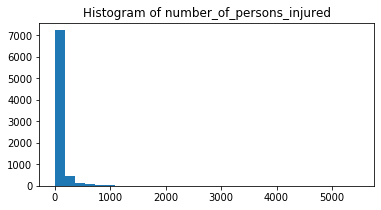

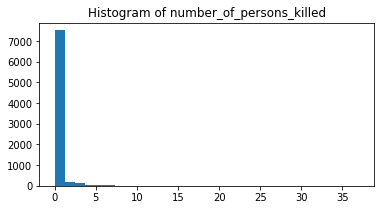

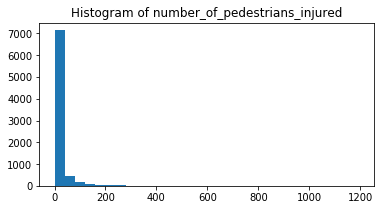

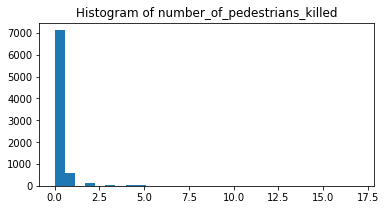

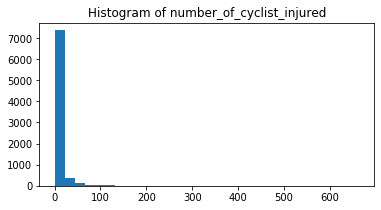

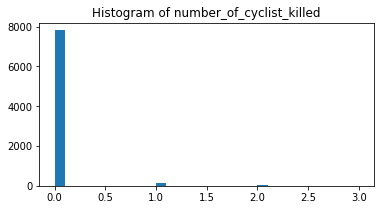

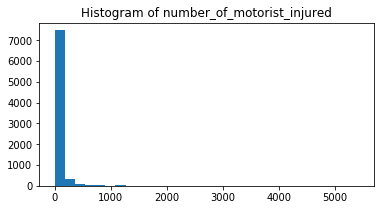

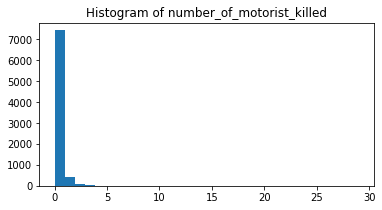

In [25]:
# Injured and killed persons
persons_list = ['number_of_persons_injured', 'number_of_persons_killed',
    'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
    'number_of_cyclist_injured', 'number_of_cyclist_killed',
    'number_of_motorist_injured', 'number_of_motorist_killed']
plot_histograms(streets_df, persons_list)

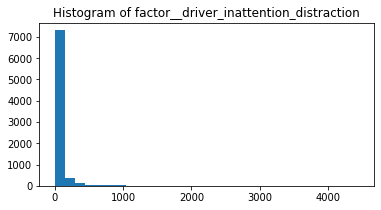

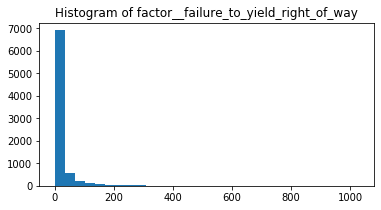

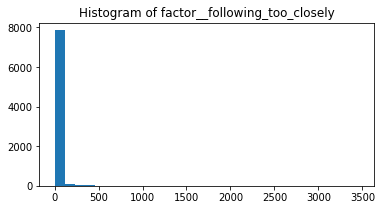

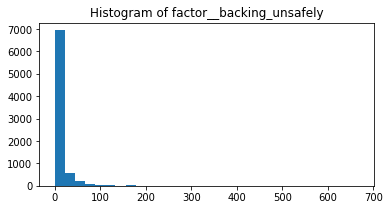

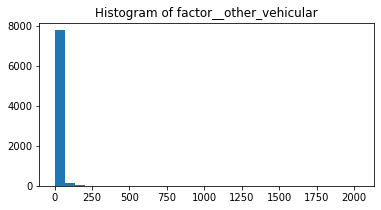

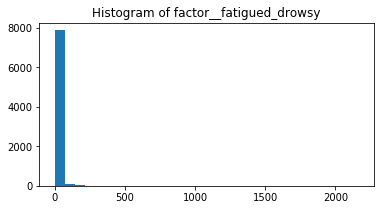

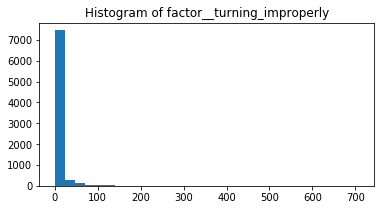

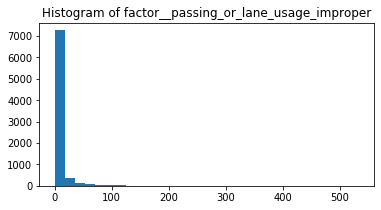

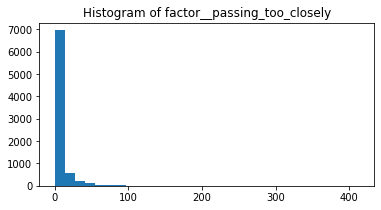

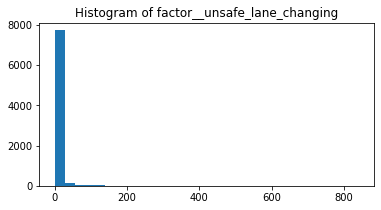

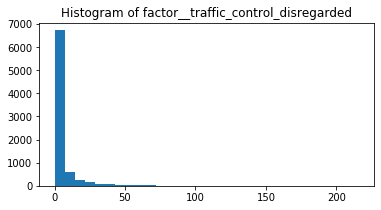

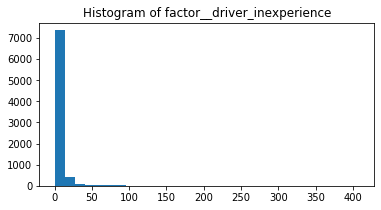

In [26]:
factors_list = [
    'factor__driver_inattention_distraction',
    'factor__failure_to_yield_right_of_way',
    'factor__following_too_closely', 'factor__backing_unsafely',
    'factor__other_vehicular', 'factor__fatigued_drowsy',
    'factor__turning_improperly', 'factor__passing_or_lane_usage_improper',
    'factor__passing_too_closely', 'factor__unsafe_lane_changing',
    'factor__traffic_control_disregarded', 'factor__driver_inexperience']
plot_histograms(streets_df, factors_list)

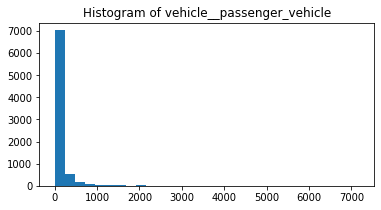

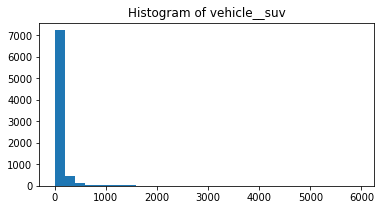

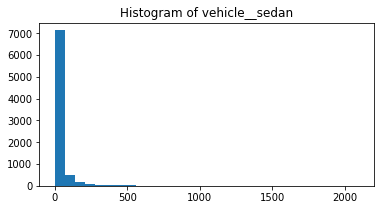

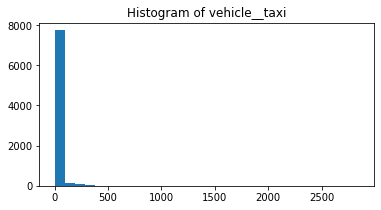

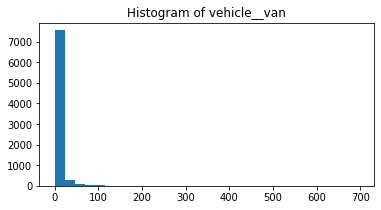

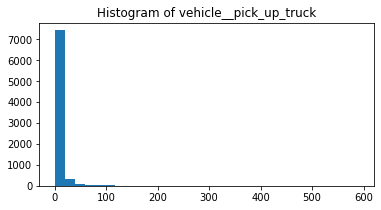

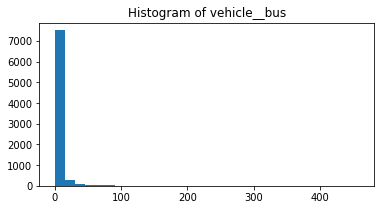

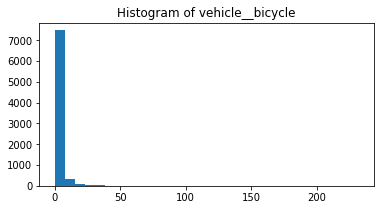

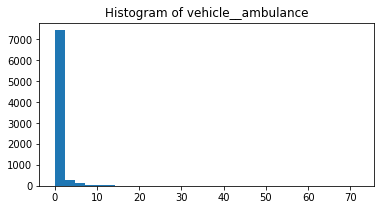

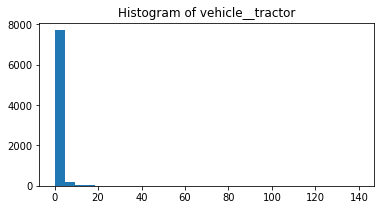

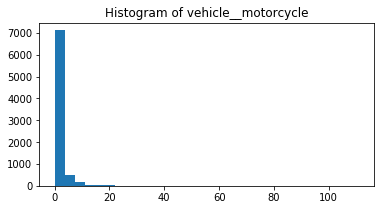

In [27]:
vehicles_list = [
    'vehicle__passenger_vehicle', 'vehicle__suv', 'vehicle__sedan',
    'vehicle__taxi', 'vehicle__van', 'vehicle__pick_up_truck',
    'vehicle__bus', 'vehicle__bicycle', 'vehicle__ambulance',
    'vehicle__tractor', 'vehicle__motorcycle']
plot_histograms(streets_df, vehicles_list)

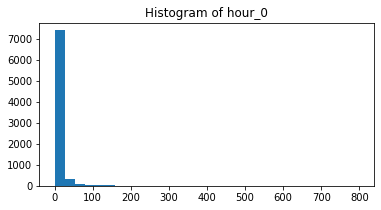

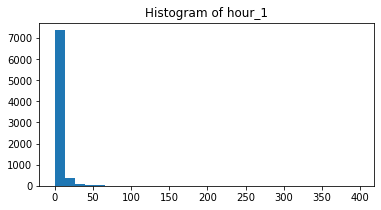

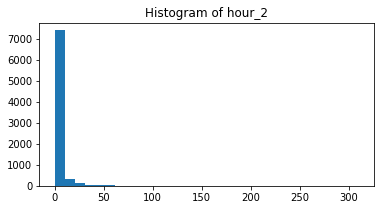

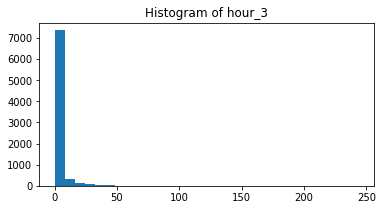

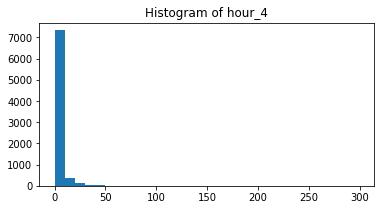

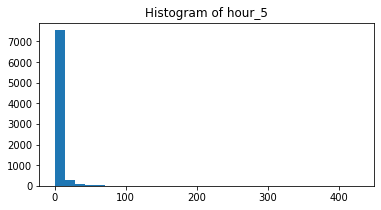

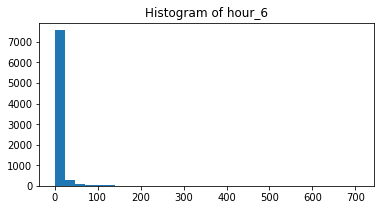

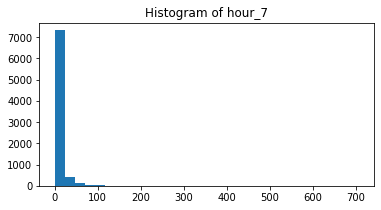

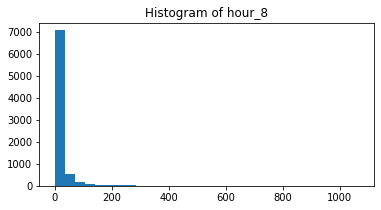

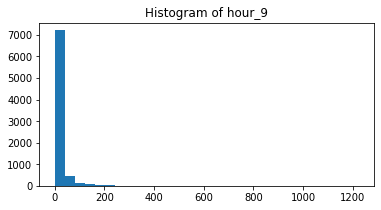

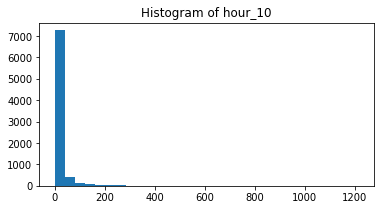

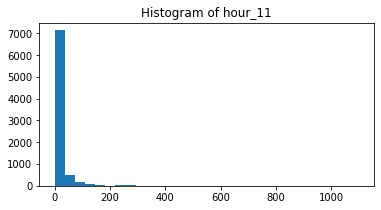

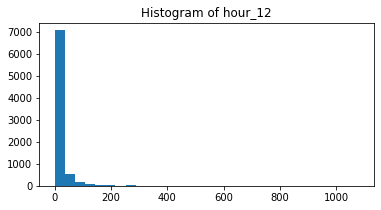

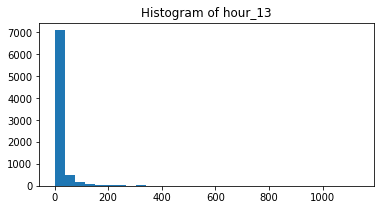

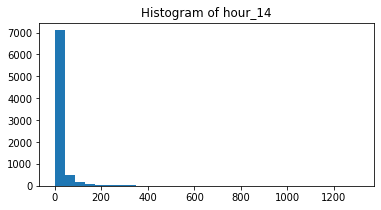

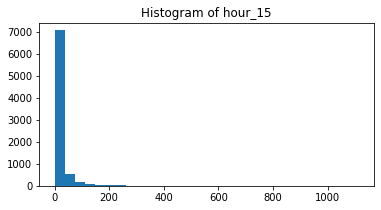

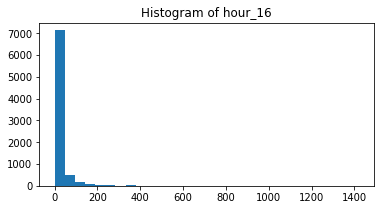

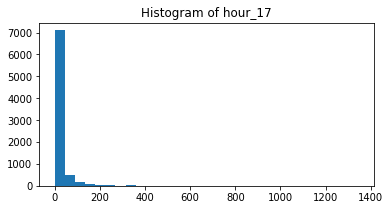

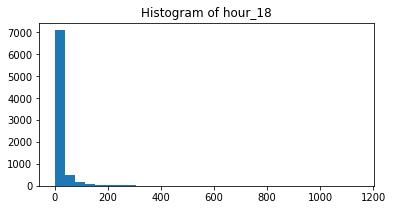

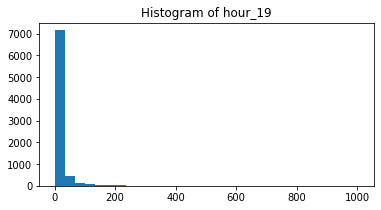

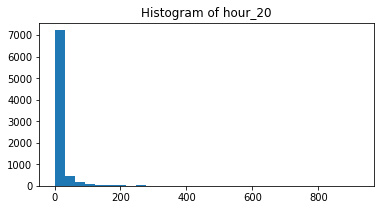

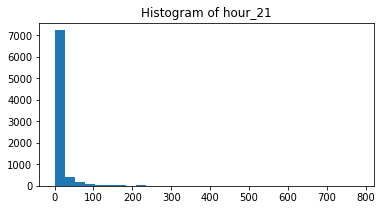

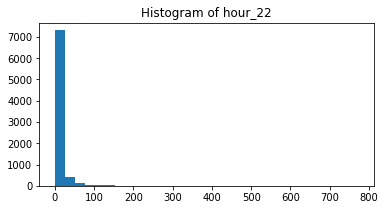

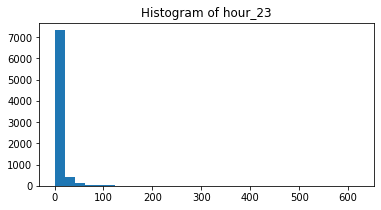

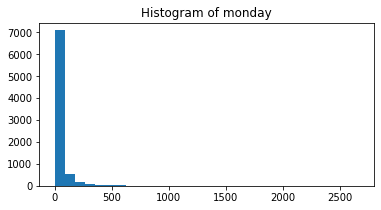

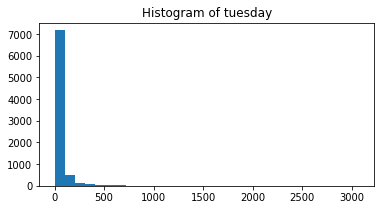

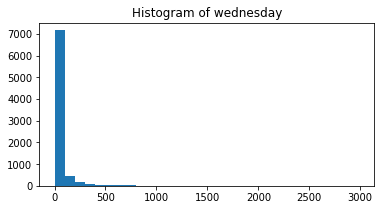

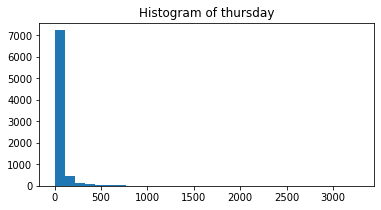

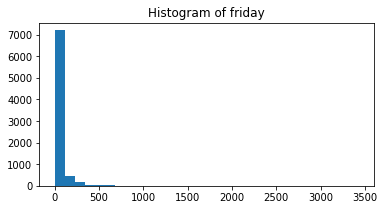

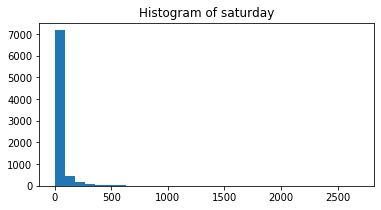

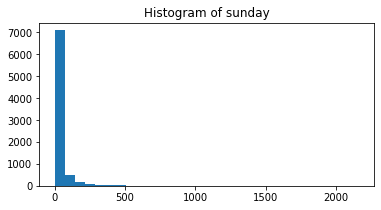

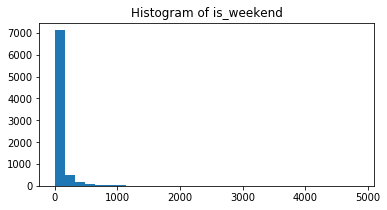

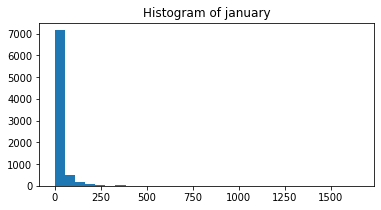

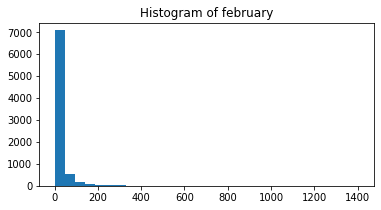

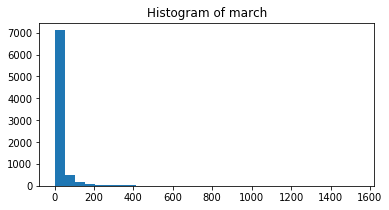

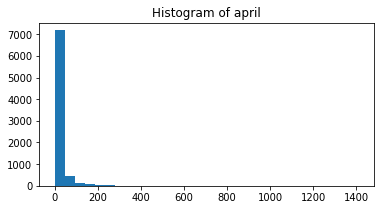

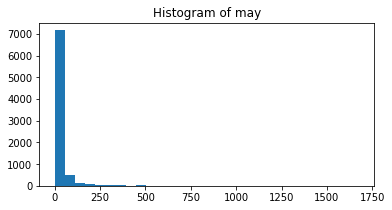

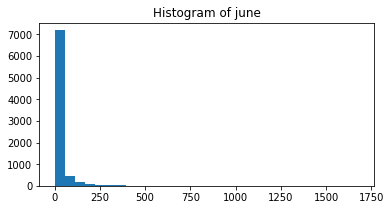

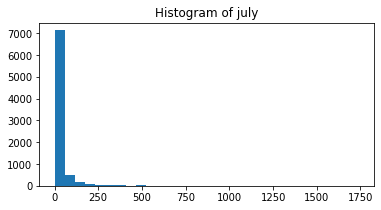

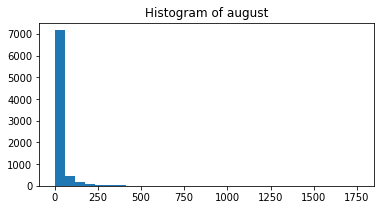

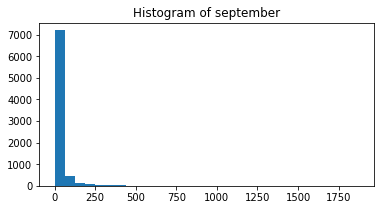

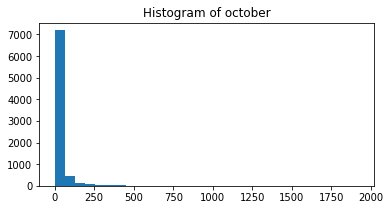

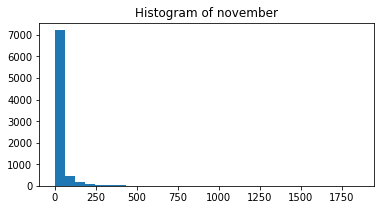

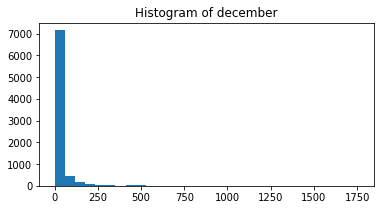

In [28]:
datetime_list = [
    'hour_0', 'hour_1', 'hour_2',
    'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
    'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
    'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
    'hour_22', 'hour_23', 'monday', 'tuesday', 'wednesday', 'thursday',
    'friday', 'saturday', 'sunday', 'is_weekend', 'january', 'february',
    'march', 'april', 'may', 'june', 'july', 'august', 'september',
    'october', 'november', 'december']
plot_histograms(streets_df, datetime_list)

In [30]:
streets_df.index = streets_df['street_city']
del streets_df['street_city']

In [31]:
streets_df.head()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,factor__driver_inattention_distraction,factor__failure_to_yield_right_of_way,...,may,june,july,august,september,october,november,december,is_intersection,is_not_intersection
street_city,,,,,,,,,,,,,,,,,,,,,
"100th Avenue, Queens, NY",97,2,3,0,4,0,90,2,41,24,...,18,16,26,21,16,17,21,24,202,18
"100th Drive, Queens, NY",4,0,0,0,1,0,3,0,3,1,...,0,0,1,1,3,0,0,4,13,4
"100th Road, Queens, NY",2,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
"100th Street, Kings, NY",8,0,2,0,1,0,5,0,7,3,...,10,3,10,6,6,8,3,6,0,82
"100th Street, Queens, NY",189,0,48,0,10,0,131,0,182,35,...,50,49,59,60,60,63,55,47,546,129


In [32]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(streets_df)
columns = streets_df.columns
temp = streets_df.copy()
temp[columns] = scaler.transform(streets_df[columns])
streets_df_scaled = temp

In [33]:
streets_df_scaled.head()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,factor__driver_inattention_distraction,factor__failure_to_yield_right_of_way,...,may,june,july,august,september,october,november,december,is_intersection,is_not_intersection
street_city,,,,,,,,,,,,,,,,,,,,,
"100th Avenue, Queens, NY",0.017685,0.054054,0.002510,0.0,0.006033,0.0,0.016584,0.068966,0.009213,0.023301,...,0.010740,0.009518,0.014934,0.011925,0.008533,0.008836,0.011321,0.013636,0.010548,0.001112
"100th Drive, Queens, NY",0.000729,0.000000,0.000000,0.0,0.001508,0.0,0.000553,0.000000,0.000674,0.000971,...,0.000000,0.000000,0.000574,0.000568,0.001600,0.000000,0.000000,0.002273,0.000679,0.000247
"100th Road, Queens, NY",0.000365,0.000000,0.000000,0.0,0.000000,0.0,0.000369,0.000000,0.000000,0.000000,...,0.000597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000052,0.000000
"100th Street, Kings, NY",0.001459,0.000000,0.001674,0.0,0.001508,0.0,0.000921,0.000000,0.001573,0.002913,...,0.005967,0.001785,0.005744,0.003407,0.003200,0.004158,0.001617,0.003409,0.000000,0.005068
"100th Street, Queens, NY",0.034458,0.000000,0.040167,0.0,0.015083,0.0,0.024139,0.000000,0.040899,0.033981,...,0.029833,0.029149,0.033889,0.034072,0.032000,0.032744,0.029650,0.026705,0.028512,0.007972


In [34]:
print(streets_df_scaled.describe())

       number_of_persons_injured  number_of_persons_killed  \
count                7990.000000               7990.000000   
mean                    0.014083                  0.009201   
std                     0.044285                  0.035032   
min                     0.000000                  0.000000   
25%                     0.000182                  0.000000   
50%                     0.001823                  0.000000   
75%                     0.010392                  0.000000   
max                     1.000000                  1.000000   

       number_of_pedestrians_injured  number_of_pedestrians_killed  \
count                    7990.000000                   7990.000000   
mean                        0.014253                      0.011647   
std                         0.045584                      0.048356   
min                         0.000000                      0.000000   
25%                         0.000000                      0.000000   
50%                  

## Data Modeling

In [51]:
from sagemaker import get_execution_role

session = sagemaker.Session()
role = get_execution_role()
print(role)

arn:aws:iam::006275120779:role/service-role/AmazonSageMaker-ExecutionRole-20200401T204101


In [52]:
bucket_name2 = session.default_bucket()
print(bucket_name2)

sagemaker-us-east-1-006275120779


In [53]:
prefix = 'streets'
output_path='s3://{}/{}/'.format(bucket_name2, prefix)

In [54]:
from sagemaker import PCA

# 77 - 1
N_COMPONENTS=76

pca_SM = PCA(role=role,
             train_instance_count=1,
             train_instance_type='ml.c4.xlarge',
             output_path=output_path,
             num_components=N_COMPONENTS, 
             sagemaker_session=session)

In [57]:
# convert df to np array
train_data_np = streets_df_scaled.values.astype('float32')

# convert to RecordSet format
formatted_train_data = pca_SM.record_set(train_data_np)

In [58]:
%%time

# train the PCA mode on the formatted data
pca_SM.fit(formatted_train_data)

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-13 03:40:31 Starting - Starting the training job...
2020-07-13 03:40:33 Starting - Launching requested ML instances......
2020-07-13 03:41:45 Starting - Preparing the instances for training......
2020-07-13 03:42:48 Downloading - Downloading input data...
2020-07-13 03:43:28 Training - Training image download completed. Training in progress.
2020-07-13 03:43:28 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[07/13/2020 03:43:25 INFO 140305211725632] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-conf.json: {u'_num_gpus': u'auto', u'_log_level': u'info', u'subtract_mean': u'true', u'force_dense': u'true', u'epochs': 1, u'algorithm_mode': u'regular', u'extra_components': u'-1', u'_kvstore': u'dist_sync', u'_num_kv_servers': u'auto'}
[07/13/2020 03:43:25 INFO 140305211725632] Reading provided configuration from /opt/ml/input/confi


2020-07-13 03:43:34 Completed - Training job completed
Training seconds: 46
Billable seconds: 46
CPU times: user 477 ms, sys: 18.1 ms, total: 495 ms
Wall time: 3min 42s


In [41]:
# Use created model

training_job_name='pca-2020-07-13-03-00-44-434'

# where the model is saved, by default
model_key = os.path.join(prefix, training_job_name, 'output/model.tar.gz')
print(model_key)

# download and unzip model
boto3.resource('s3').Bucket(bucket_name2).download_file(model_key, 'model.tar.gz')

# unzipping as model_algo-1
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo-1')

streets/pca-2020-07-13-03-00-44-434/output/model.tar.gz


2304

In [6]:
import mxnet as mx

# loading the unzipped artifacts
pca_model_params = mx.ndarray.load('model_algo-1')

# what are the params
print(pca_model_params)

{'s': 
[           nan            nan 1.61837239e-03 2.15460802e-03
 7.68422261e-02 1.04500875e-01 1.73892722e-01 1.84098914e-01
 1.93696454e-01 2.03601733e-01 2.15352640e-01 2.28391692e-01
 2.37656131e-01 2.48948261e-01 2.54175484e-01 2.59164184e-01
 2.62757212e-01 2.69009054e-01 2.77671605e-01 2.89450198e-01
 2.91878551e-01 2.99390614e-01 3.05442780e-01 3.08743745e-01
 3.13480824e-01 3.21597338e-01 3.24649662e-01 3.33393246e-01
 3.40419382e-01 3.43046516e-01 3.49858493e-01 3.54105979e-01
 3.58261049e-01 3.63609254e-01 3.69137257e-01 3.83826435e-01
 3.91432166e-01 3.91978085e-01 3.97146702e-01 4.28536564e-01
 4.51678574e-01 4.62648153e-01 4.79570627e-01 5.00418127e-01
 5.14542878e-01 5.30971646e-01 5.40328801e-01 5.71223617e-01
 5.98456621e-01 6.18360758e-01 6.34087682e-01 6.57845974e-01
 6.87686443e-01 7.17521966e-01 7.28587568e-01 8.07570577e-01
 8.39793086e-01 9.32936788e-01 9.81311202e-01 1.05359292e+00
 1.10795975e+00 1.23650944e+00 1.29207957e+00 1.40506709e+00
 1.50001490e+00 1

In [7]:
# get selected params
s=pd.DataFrame(pca_model_params['s'].asnumpy())
v=pd.DataFrame(pca_model_params['v'].asnumpy())

In [8]:
# 77 - 1
N_COMPONENTS=76

In [9]:
# looking at top 5 components
n_principal_components = 5

start_idx = N_COMPONENTS - n_principal_components  # 76-n

# print a selection of s
print(s.iloc[start_idx:, :])

            0
71   2.905169
72   3.921828
73   5.046423
74   5.602397
75  31.069687


In [10]:
def explained_variance(s, n_top_components):
    '''Calculates the approx. data variance that n_top_components captures.
       :param s: A dataframe of singular values for top components; 
           the top value is in the last row.
       :param n_top_components: An integer, the number of top components to use.
       :return: The expected data variance covered by the n_top_components.'''
    return s[-n_top_components:].pow(2).sum()/s.pow(2).sum()

In [20]:
# test cell
n_top_components = 5 # select a value for the number of top components

# calculate the explained variance
exp_variance = explained_variance(s, n_top_components)
print('Explained variance: ', exp_variance)

Explained variance:  0    0.955097
dtype: float32


In [43]:
import seaborn as sns

def display_component(v, features_list, component_num, n_weights=10):
    
    # get index of component (last row - component_num)
    row_idx = N_COMPONENTS-component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,10))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()

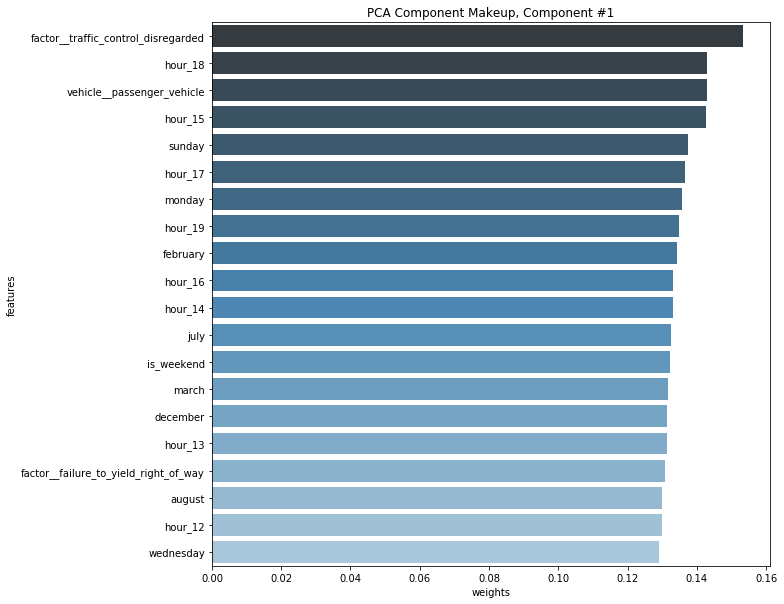

In [44]:
# display makeup of first component
num=1
display_component(v, streets_df_scaled.columns.values, component_num=num, n_weights=20)

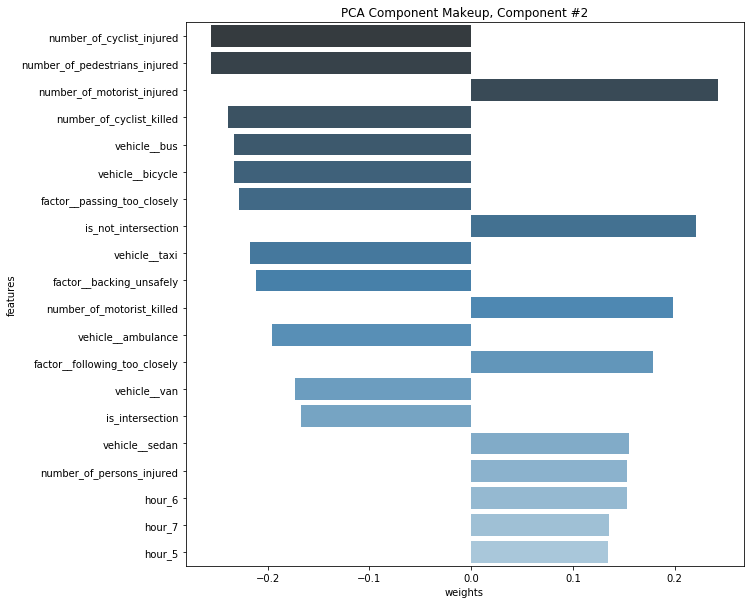

In [45]:
# display makeup of first component
num=2
display_component(v, streets_df_scaled.columns.values, component_num=num, n_weights=20)

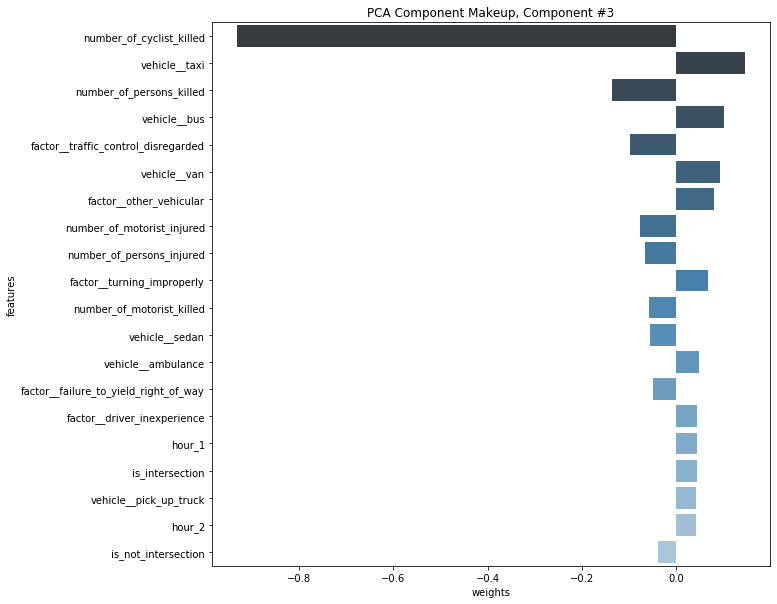

In [46]:
# display makeup of first component
num=3
display_component(v, streets_df_scaled.columns.values, component_num=num, n_weights=20)

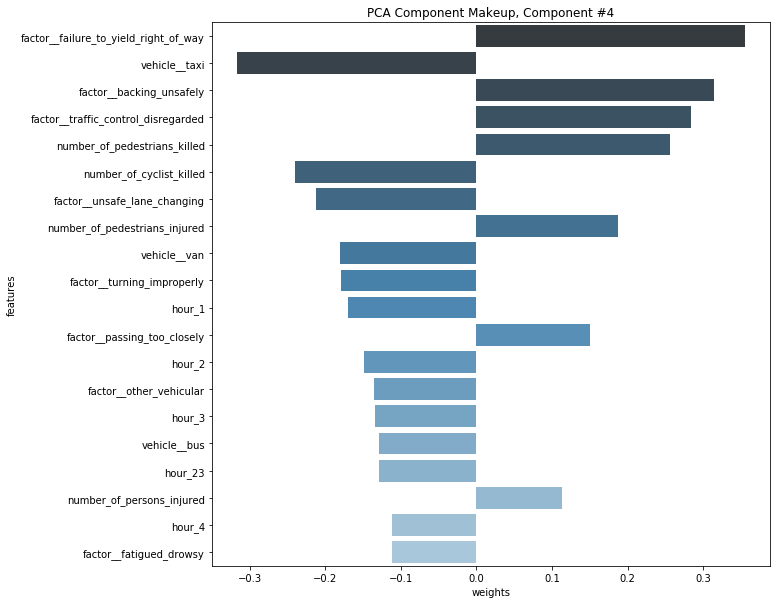

In [47]:
# display makeup of first component
num=4
display_component(v, streets_df_scaled.columns.values, component_num=num, n_weights=20)

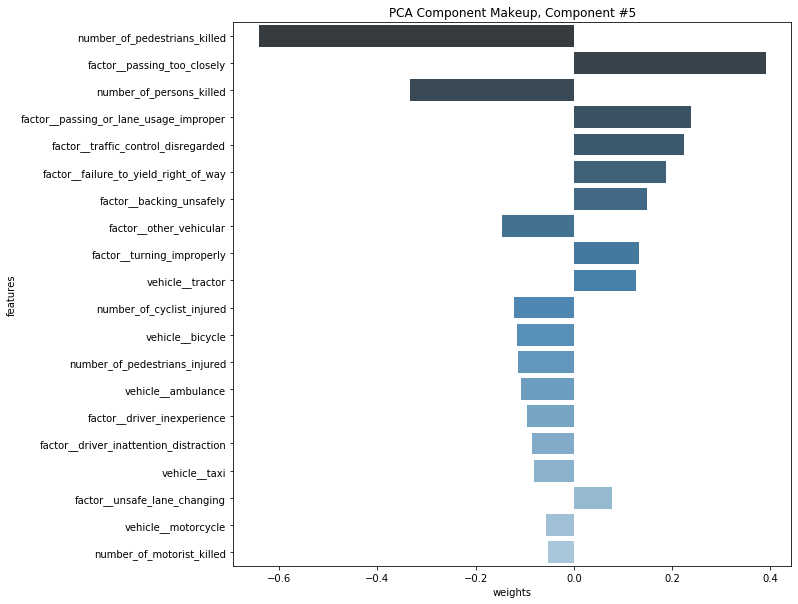

In [48]:
# display makeup of first component
num=5
display_component(v, streets_df_scaled.columns.values, component_num=num, n_weights=20)

## Deploy PCA model

In [60]:
%%time

pca_predictor = pca_SM.deploy(initial_instance_count=1, 
                              instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.
Using already existing model: pca-2020-07-13-03-40-31-685


-----------------!CPU times: user 292 ms, sys: 23.5 ms, total: 315 ms
Wall time: 8min 33s


In [61]:
train_pca = pca_predictor.predict(train_data_np)

In [62]:
data_idx = 0
print(train_pca[data_idx])

label {
  key: "projection"
  value {
    float32_tensor {
      values: 5.76805234686617e-07
      values: 6.698915200331612e-08
      values: 2.992140366586682e-07
      values: 1.5649349904833798e-07
      values: -0.000299029954476282
      values: -0.00033904460724443197
      values: 0.0008863899856805801
      values: 0.0018049577483907342
      values: 0.001904990989714861
      values: -0.0036464992444962263
      values: -0.0012257921043783426
      values: 0.004078459460288286
      values: -0.001398534863255918
      values: 0.0017021134262904525
      values: -0.002795390086248517
      values: 0.004608123563230038
      values: -0.0021518520079553127
      values: 0.00021773693151772022
      values: -3.674867912195623e-05
      values: 0.001865985686890781
      values: -0.0007005211664363742
      values: -0.0012943560723215342
      values: -5.8722798712551594e-05
      values: 0.0030160327441990376
      values: 0.0008709158282727003
      values: -0.00256536668166518

In [63]:
def create_transformed_df(train_pca, df_scaled, n_top_components):
    ''' Return a dataframe of data points with component features. 
        The dataframe should be indexed by State-County and contain component values.
        :param train_pca: A list of pca training data, returned by a PCA model.
        :param counties_scaled: A dataframe of normalized, original features.
        :param n_top_components: An integer, the number of top components to use.
        :return: A dataframe, indexed by State-County, with n_top_component values as columns.        
    '''
    data = {}
    size = len(train_pca)
    for i in range(n_top_components):
        data['c_{}'.format(i+1)] = [train_pca[j].label['projection'].float32_tensor.values[-i-1] for j in range(size)]
    transformed_df = pd.DataFrame(data=data, index=df_scaled.index)
    return transformed_df

In [64]:
create_transformed_df(train_pca, streets_df_scaled, 5).head()

,c_1,c_2,c_3,c_4,c_5
street_city,,,,,
"100th Avenue, Queens, NY",-0.022777,0.035073,-0.009544,0.015340,-0.011279
"100th Drive, Queens, NY",-0.107436,0.000347,0.003553,-0.008035,-0.003171
"100th Road, Queens, NY",-0.113299,0.002167,0.002954,-0.008789,-0.003356
"100th Street, Kings, NY",-0.085527,0.002889,0.005174,-0.008929,0.001665
"100th Street, Queens, NY",0.136673,0.025241,0.008200,0.025324,0.013837


In [65]:
## Specify top n
top_n = 5

# call your function and create a new dataframe
streets_transformed = create_transformed_df(train_pca, streets_df_scaled, n_top_components=top_n)

streets_transformed.head()

,c_1,c_2,c_3,c_4,c_5
street_city,,,,,
"100th Avenue, Queens, NY",-0.022777,0.035073,-0.009544,0.015340,-0.011279
"100th Drive, Queens, NY",-0.107436,0.000347,0.003553,-0.008035,-0.003171
"100th Road, Queens, NY",-0.113299,0.002167,0.002954,-0.008789,-0.003356
"100th Street, Kings, NY",-0.085527,0.002889,0.005174,-0.008929,0.001665
"100th Street, Queens, NY",0.136673,0.025241,0.008200,0.025324,0.013837


In [66]:
session.delete_endpoint(pca_predictor.endpoint)

## K-means

In [ ]:
# XXX: Find optimal K
# https://aws.amazon.com/blogs/machine-learning/k-means-clustering-with-amazon-sagemaker/

In [67]:
import sagemaker
# Try different k
kmeans = sagemaker.KMeans(role=role, train_instance_count=1, train_instance_type='ml.c4.xlarge', k=5)
print(kmeans)

In [68]:
streets_transformed_np = streets_transformed.values.astype('float32')
streets_rs = kmeans.record_set(streets_transformed_np)

In [69]:
kmeans.fit(streets_rs)

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-14 01:27:33 Starting - Starting the training job...
2020-07-14 01:27:35 Starting - Launching requested ML instances......
2020-07-14 01:28:50 Starting - Preparing the instances for training.........
2020-07-14 01:30:24 Downloading - Downloading input data...
2020-07-14 01:30:36 Training - Downloading the training image.Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 01:31:00 INFO 140134753089344] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', u


2020-07-14 01:31:16 Uploading - Uploading generated training model
2020-07-14 01:31:16 Completed - Training job completed
Training seconds: 52
Billable seconds: 52


In [96]:
from scipy.spatial.distance import cdist

In [104]:
streets_transformed_tmp = streets_transformed[['c_1', 'c_2', 'c_3', 'c_4', 'c_5']]

In [106]:
def run_kmeans_fit(rs, k, role):
    bn = 'sagemaker-us-east-1-006275120779'
    output_path = 's3://{}/{}'.format(bn, k)
    kmeans = sagemaker.KMeans(
        role=role, train_instance_count=1, train_instance_type='ml.c4.xlarge',
        k=k, output_path=output_path)
    kmeans.fit(rs)
    return '{}/{}/output/model.tar.gz'.format(k, kmeans.latest_training_job.name)

In [107]:
run_kmeans_fit(streets_rs, 2, role)  # Trial run for k=2

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-14 22:30:32 Starting - Starting the training job...
2020-07-14 22:30:35 Starting - Launching requested ML instances......
2020-07-14 22:31:51 Starting - Preparing the instances for training......
2020-07-14 22:32:58 Downloading - Downloading input data......
2020-07-14 22:34:00 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 22:34:03 INFO 140171607983936] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_


2020-07-14 22:34:12 Uploading - Uploading generated training model
2020-07-14 22:34:12 Completed - Training job completed
Training seconds: 74
Billable seconds: 74


In [118]:
# WARNING: A very long calculation
model_keys = {}
for k in range(2, 11):
    model_keys[k] = run_kmeans_fit(streets_rs, k, role)

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-14 22:53:24 Starting - Starting the training job...
2020-07-14 22:53:34 Starting - Launching requested ML instances.........
2020-07-14 22:55:15 Starting - Preparing the instances for training.........
2020-07-14 22:56:49 Downloading - Downloading input data
2020-07-14 22:56:49 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 22:57:09 INFO 140454698800960] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_center_factor': u'auto', 


2020-07-14 22:57:21 Uploading - Uploading generated training model
2020-07-14 22:57:21 Completed - Training job completed
Training seconds: 44
Billable seconds: 44


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-14 22:57:38 Starting - Starting the training job...
2020-07-14 22:57:44 Starting - Launching requested ML instances......
2020-07-14 22:59:06 Starting - Preparing the instances for training......
2020-07-14 23:00:07 Downloading - Downloading input data......
2020-07-14 23:00:55 Training - Downloading the training image..
2020-07-14 23:01:27 Uploading - Uploading generated training model
2020-07-14 23:01:27 Completed - Training job completed


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 80
Billable seconds: 80
2020-07-14 23:01:50 Starting - Starting the training job...
2020-07-14 23:01:53 Starting - Launching requested ML instances.........
2020-07-14 23:03:34 Starting - Preparing the instances for training.........
2020-07-14 23:04:55 Downloading - Downloading input data...
2020-07-14 23:05:48 Training - Training image download completed. Training in progress.
2020-07-14 23:05:48 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:05:46 INFO 139962849097536] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random


2020-07-14 23:05:55 Completed - Training job completed


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 60
Billable seconds: 60
2020-07-14 23:06:33 Starting - Starting the training job...
2020-07-14 23:06:36 Starting - Launching requested ML instances.........
2020-07-14 23:08:22 Starting - Preparing the instances for training......
2020-07-14 23:09:12 Downloading - Downloading input data...
2020-07-14 23:09:59 Training - Downloading the training image...
2020-07-14 23:10:33 Uploading - Uploading generated training model
2020-07-14 23:10:33 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:10:25 INFO 140181968516928] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': 

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 81
Billable seconds: 81
2020-07-14 23:10:46 Starting - Starting the training job...
2020-07-14 23:10:48 Starting - Launching requested ML instances......
2020-07-14 23:12:03 Starting - Preparing the instances for training......
2020-07-14 23:12:54 Downloading - Downloading input data...
2020-07-14 23:13:30 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:13:53 INFO 140647338469184] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'fa


2020-07-14 23:14:02 Uploading - Uploading generated training model
2020-07-14 23:14:02 Completed - Training job completed


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 68
Billable seconds: 68
2020-07-14 23:14:28 Starting - Starting the training job...
2020-07-14 23:14:30 Starting - Launching requested ML instances......
2020-07-14 23:15:44 Starting - Preparing the instances for training.........
2020-07-14 23:17:20 Downloading - Downloading input data
2020-07-14 23:17:20 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:17:37 INFO 140072938063680] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'fa


2020-07-14 23:17:47 Uploading - Uploading generated training model
2020-07-14 23:17:47 Completed - Training job completed


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 39
Billable seconds: 39


's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-14 23:18:10 Starting - Starting the training job...
2020-07-14 23:18:12 Starting - Launching requested ML instances.........
2020-07-14 23:19:56 Starting - Preparing the instances for training.........
2020-07-14 23:21:38 Downloading - Downloading input data
2020-07-14 23:21:38 Training - Downloading the training image...
2020-07-14 23:22:10 Uploading - Uploading generated training model
2020-07-14 23:22:10 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:22:01 INFO 140670024111936] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_l

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 39
Billable seconds: 39
2020-07-14 23:22:22 Starting - Starting the training job...
2020-07-14 23:22:25 Starting - Launching requested ML instances.........
2020-07-14 23:24:06 Starting - Preparing the instances for training......
2020-07-14 23:25:19 Downloading - Downloading input data...
2020-07-14 23:25:36 Training - Downloading the training image.Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:25:58 INFO 139905769613120] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'


2020-07-14 23:26:08 Uploading - Uploading generated training model
2020-07-14 23:26:08 Completed - Training job completed


'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


Training seconds: 49
Billable seconds: 49
2020-07-14 23:26:35 Starting - Starting the training job...
2020-07-14 23:26:38 Starting - Launching requested ML instances......
2020-07-14 23:27:55 Starting - Preparing the instances for training.........
2020-07-14 23:29:10 Downloading - Downloading input data...
2020-07-14 23:30:05 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/14/2020 23:30:08 INFO 140659544893248] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'


2020-07-14 23:30:17 Uploading - Uploading generated training model
2020-07-14 23:30:17 Completed - Training job completed
Training seconds: 67
Billable seconds: 67


In [116]:
kmeans.latest_training_job.name 

'kmeans-2020-07-14-01-27-33-712'

In [121]:
# model_keys = {
#     2: '2/kmeans-2020-07-14-22-53-24-572/output/model.tar.gz',
#     3: '3/kmeans-2020-07-14-22-57-38-266/output/model.tar.gz',
#     4: '4/kmeans-2020-07-14-23-01-50-715/output/model.tar.gz',
#     5: '5/kmeans-2020-07-14-23-06-33-412/output/model.tar.gz',
#     6: '6/kmeans-2020-07-14-23-10-45-976/output/model.tar.gz',
#     7: '7/kmeans-2020-07-14-23-14-28-068/output/model.tar.gz',
#     8: '8/kmeans-2020-07-14-23-18-10-316/output/model.tar.gz',
#     9: '9/kmeans-2020-07-14-23-22-22-728/output/model.tar.gz',
#     10: '10/kmeans-2020-07-14-23-26-35-359/output/model.tar.gz',
# }

In [122]:
model_keys

{2: '2/kmeans-2020-07-14-22-53-24-572/output/model.tar.gz',
 3: '3/kmeans-2020-07-14-22-57-38-266/output/model.tar.gz',
 4: '4/kmeans-2020-07-14-23-01-50-715/output/model.tar.gz',
 5: '5/kmeans-2020-07-14-23-06-33-412/output/model.tar.gz',
 6: '6/kmeans-2020-07-14-23-10-45-976/output/model.tar.gz',
 7: '7/kmeans-2020-07-14-23-14-28-068/output/model.tar.gz',
 8: '8/kmeans-2020-07-14-23-18-10-316/output/model.tar.gz',
 9: '9/kmeans-2020-07-14-23-22-22-728/output/model.tar.gz',
 10: '10/kmeans-2020-07-14-23-26-35-359/output/model.tar.gz'}

In [103]:
kmeans_model = mx.ndarray.load('model_algo-1')
kmeans_numpy = kmeans_model[0].asnumpy()
distortion = sum(np.min(cdist(streets_transformed_tmp, kmeans_numpy, 'euclidean'), axis=1)) / streets_transformed_tmp.shape[0]
print(distortion)  # 0.05455268327216128
# print(kmeans_numpy)
# print(streets_transformed.shape)

0.05455268327216128


In [102]:
streets_transformed.head()

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"100th Avenue, Queens, NY",-0.022777,0.035073,-0.009544,0.015340,-0.011279,4
"100th Drive, Queens, NY",-0.107436,0.000347,0.003553,-0.008035,-0.003171,0
"100th Road, Queens, NY",-0.113299,0.002167,0.002954,-0.008789,-0.003356,0
"100th Street, Kings, NY",-0.085527,0.002889,0.005174,-0.008929,0.001665,0
"100th Street, Queens, NY",0.136673,0.025241,0.008200,0.025324,0.013837,2


In [125]:
def get_distortion(bucket_name, model_key, df):
    # download and unzip model
    boto3.resource('s3').Bucket(bucket_name).download_file(model_key, 'model.tar.gz')
    # unzipping as model_algo-1
    os.system('tar -zxvf model.tar.gz')
    os.system('unzip model_algo-1')
    kmeans_model = mx.ndarray.load('model_algo-1')
    kmeans_numpy = kmeans_model[0].asnumpy()
    return sum(np.min(cdist(df, kmeans_numpy, 'euclidean'), axis=1)) / df.shape[0]

In [126]:
k_list = []
distortions = []
for k, model_key in model_keys.items():
    k_list.append(k)
    dist = get_distortion(bucket_name2, model_key, streets_transformed_tmp)
    distortions.append(dist)
print(distortions)

[0.09677154319398021, 0.07540288758219163, 0.06304325365721802, 0.06370311884653652, 0.054983099648486834, 0.04769420901940647, 0.04331694053140318, 0.042348865243549506, 0.041419052151975694]


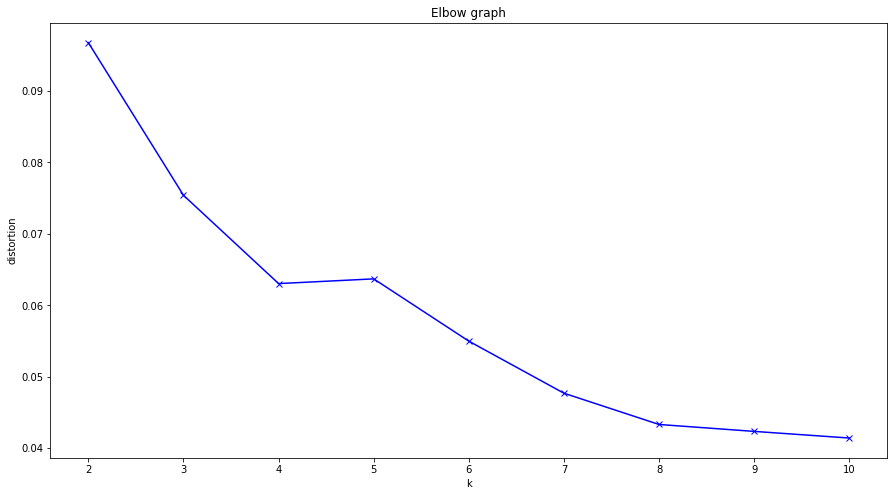

In [164]:
# Plot the elbow
plt.figure(figsize=(15,8))
plt.plot(k_list, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.title('Elbow graph')
plt.show()

In [128]:
# Optimal K=4

In [129]:
kmeans = sagemaker.KMeans(role=role, train_instance_count=1, train_instance_type='ml.c4.xlarge', k=4)

In [131]:
kmeans.fit(streets_rs)

'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.
's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.
'get_image_uri' method will be deprecated in favor of 'ImageURIProvider' class in SageMaker Python SDK v2.


2020-07-15 00:05:20 Starting - Starting the training job...
2020-07-15 00:05:23 Starting - Launching requested ML instances......
2020-07-15 00:06:37 Starting - Preparing the instances for training.........
2020-07-15 00:08:12 Downloading - Downloading input data
2020-07-15 00:08:12 Training - Downloading the training image...
2020-07-15 00:08:48 Uploading - Uploading generated training model
2020-07-15 00:08:48 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/15/2020 00:08:39 INFO 140043083937600] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloy

Training seconds: 48
Billable seconds: 48


In [132]:
%%time
# deploy the model to create a predictor
kmeans_predictor = kmeans.deploy(initial_instance_count=1, 
                                 instance_type='ml.t2.medium')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


-----------------!CPU times: user 303 ms, sys: 18.1 ms, total: 321 ms
Wall time: 8min 32s


In [133]:
# get the predicted clusters for all the kmeans training data
cluster_info = kmeans_predictor.predict(streets_transformed_np)

In [134]:
# print cluster info for first data point
data_idx = 0

print('Street is: ', streets_transformed.index[data_idx])
print()
print(cluster_info[data_idx])

Street is:  100th Avenue, Queens, NY

label {
  key: "closest_cluster"
  value {
    float32_tensor {
      values: 1.0
    }
  }
}
label {
  key: "distance_to_cluster"
  value {
    float32_tensor {
      values: 0.0776713564991951
    }
  }
}



In [135]:
# get all cluster labels
cluster_labels = [c.label['closest_cluster'].float32_tensor.values[0] for c in cluster_info]

In [136]:
# count up the points in each cluster
cluster_df = pd.DataFrame(cluster_labels)[0].value_counts()

print(cluster_df)

1.0    6407
3.0    1141
0.0     383
2.0      59
Name: 0, dtype: int64


In [137]:
# delete kmeans endpoint
session.delete_endpoint(kmeans_predictor.endpoint)

## Model attributes

In [138]:
# download and unzip the kmeans model file
# use the name model_algo-1
training_job_name = kmeans.latest_training_job.name  # Example: 'kmeans-2020-07-14-01-27-33-712'

# where the model is saved, by default
model_key = os.path.join(training_job_name, 'output/model.tar.gz')
print(model_key)

# download and unzip model
boto3.resource('s3').Bucket(bucket_name2).download_file(model_key, 'model.tar.gz')

# unzipping as model_algo-1
os.system('tar -zxvf model.tar.gz')
os.system('unzip model_algo-1')

kmeans-2020-07-15-00-05-20-176/output/model.tar.gz


2304

In [139]:
# get the trained kmeans params using mxnet
# loading the unzipped artifacts
kmeans_model_params = mx.ndarray.load('model_algo-1')

print(kmeans_model_params)

[
[[ 5.54219306e-01 -1.98705718e-02 -2.40580197e-02  4.46812361e-02
   1.00690164e-02]
 [-8.80557746e-02  2.08135997e-03  3.83516867e-03 -5.05146710e-03
  -1.87920011e-03]
 [ 2.92986131e+00  6.29404411e-02 -2.53199860e-02 -3.52037922e-02
  -1.05179232e-02]
 [ 1.12177595e-01 -7.91298971e-03 -1.29100708e-02  1.36005618e-02
   9.22227930e-03]]
<NDArray 4x5 @cpu(0)>]


In [141]:
# streets_transformed = streets_transformed_tmp

In [142]:
cluster_centroids=pd.DataFrame(kmeans_model_params[0].asnumpy())
cluster_centroids.columns=streets_transformed.columns

display(cluster_centroids)

,c_1,c_2,c_3,c_4,c_5
0,0.554219,-0.019871,-0.024058,0.044681,0.010069
1,-0.088056,0.002081,0.003835,-0.005051,-0.001879
2,2.929861,0.062940,-0.025320,-0.035204,-0.010518
3,0.112178,-0.007913,-0.012910,0.013601,0.009222


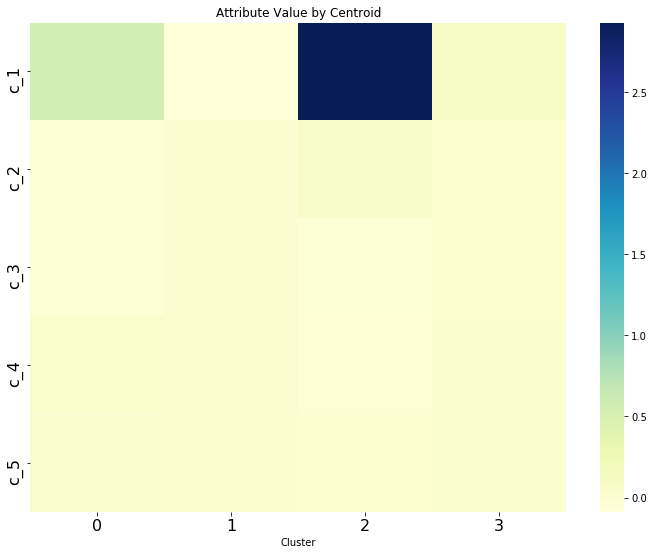

In [143]:
# generate a heatmap in component space, using the seaborn library
plt.figure(figsize = (12,9))
ax = sns.heatmap(cluster_centroids.T, cmap = 'YlGnBu')
ax.set_xlabel("Cluster")
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
ax.set_title("Attribute Value by Centroid")
plt.show()

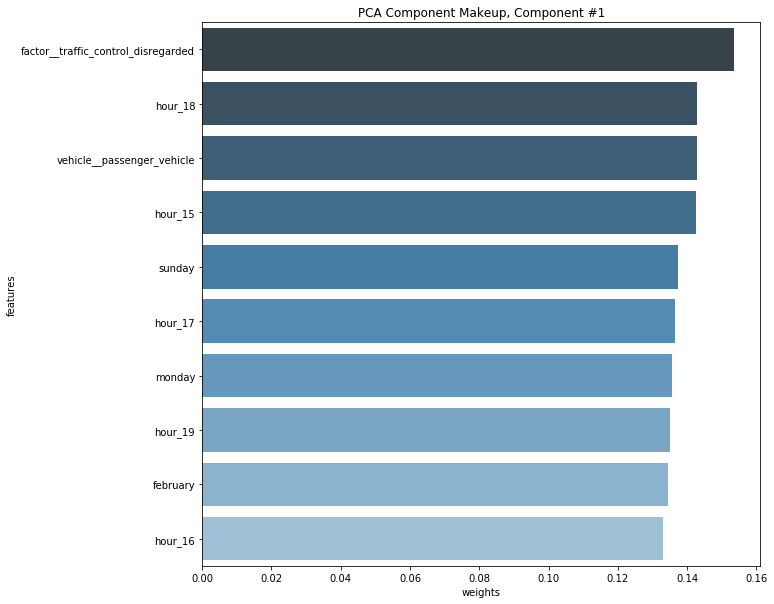

In [144]:
component_num = 1
display_component(v, streets_df_scaled.columns.values, component_num=component_num)

In [145]:
# add a 'labels' column to the dataframe
streets_transformed['labels']=list(map(int, cluster_labels))

# sort by cluster label 0-6
sorted_streets = streets_transformed.sort_values('labels', ascending=True)
# view some pts in cluster 0
sorted_streets.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"Carroll Street, Kings, NY",0.343678,-0.044849,0.030327,0.056601,-0.006047,0
"Booth Memorial Avenue, Queens, NY",0.334320,0.001728,-0.008118,0.138228,0.056438,0
"90th Avenue, Queens, NY",0.428128,0.019989,0.010274,0.117358,0.104571,0
"225th Street, Queens, NY",0.346966,0.010751,-0.314830,-0.024157,0.033016,0
"Borden Avenue, Queens, NY",0.541048,-0.145757,-0.916450,-0.245221,0.076035,0
"Columbus Avenue, New York, NY",1.511552,-0.238995,0.183134,-0.015152,-0.059883,0
"90th Street, Queens, NY",0.379852,-0.060337,-0.304423,0.014946,-0.045046,0
"Flatlands Avenue, Kings, NY",0.428806,0.059037,0.018908,0.028268,-0.015706,0
"91st Avenue, Queens, NY",0.535854,0.054913,0.011904,0.099323,0.056926,0


In [88]:
# get all streets with label
label = 1
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"10th Avenue, New York, NY",3.698854,-0.552950,0.150901,-0.410364,0.779525,1
"11th Avenue, New York, NY",2.572565,-0.427033,-0.033742,-0.123142,0.590916,1
"1st Avenue, New York, NY",5.012228,-0.831180,-0.067207,-0.367988,-0.491100,1
"2nd Avenue, New York, NY",7.583614,-0.750211,0.970788,-0.866848,-0.323405,1
"31st Street, Queens, NY",1.209643,0.075689,0.048117,0.100720,0.234549,1
"34th Avenue, Queens, NY",1.416093,-0.037835,0.048293,0.242450,-0.062944,1
"37th Avenue, Queens, NY",1.791203,-0.177043,-0.232613,0.270588,0.026712,1
"3rd Avenue, Kings, NY",1.377077,-0.009382,-0.301234,0.144404,-0.004516,1
"3rd Avenue, New York, NY",6.210366,-0.578836,0.718754,-0.437398,-0.441828,1


In [89]:
# get all streets with label
label = 2
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"100th Street, Queens, NY",0.136673,0.025241,0.008200,0.025324,0.013837,2
"101st Street, Queens, NY",0.121993,-0.005713,0.007017,0.045564,-0.029129,2
"103-24 Roosevelt Avenue, Queens, NY",0.120114,-0.019387,0.006643,0.030362,-0.111885,2
"103rd Street, Queens, NY",0.192047,-0.022458,0.024841,0.017981,0.018449,2
"104th Avenue, Queens, NY",0.205218,0.063101,-0.009013,0.063680,0.042188,2
"104th Street, Queens, NY",0.343599,-0.009553,0.012026,0.100842,-0.052530,2
"10th Avenue, Kings, NY",0.215863,0.020450,0.005181,0.061946,0.045345,2
"110th Street, Queens, NY",0.249414,-0.009147,0.008281,0.088973,0.027141,2
"113th Street, Queens, NY",0.149895,0.009809,-0.000570,0.078707,0.004080,2


In [90]:
# get all streets with label
label = 3
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"101st Avenue, Queens, NY; Kings, NY",0.764141,0.034507,0.035077,0.119753,0.078745,3
"102nd Street, Queens, NY",0.500105,-0.032335,0.028026,0.104668,0.028145,3
"103rd Avenue, Queens, NY",0.620032,0.050023,0.006279,0.161315,0.082366,3
"107th Avenue, Queens, NY",0.741983,0.072170,-0.006037,0.185652,0.128805,3
"108th Street, Queens, NY",1.048073,-0.013278,0.024073,0.229510,0.005503,3
"109th Avenue, Queens, NY",0.605643,0.075610,-0.005460,0.152991,0.097241,3
"111th Avenue, Queens, NY",0.495848,0.076588,-0.005653,0.117896,0.034217,3
"111th Street, Queens, NY",0.517596,0.035930,0.010052,0.108786,0.004425,3
"112th Street, Queens, NY",0.377664,0.017149,0.005958,0.108614,0.059717,3


In [91]:
# get all streets with label
label = 4
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"100th Avenue, Queens, NY",-0.022777,0.035073,-0.009544,0.015340,-0.011279,4
"102nd Avenue, Queens, NY",-0.038127,0.009522,0.004315,0.002515,0.006400,4
"105th Avenue, Queens, NY",0.074769,0.011226,0.006450,0.022493,0.042930,4
"105th Street, Queens, NY",0.082791,0.015629,0.003623,0.029666,-0.033543,4
"106th Avenue, Queens, NY",-0.023414,0.014212,0.000953,0.015848,0.019457,4
"106th Street, Queens, NY",0.058492,0.003625,0.006585,0.026897,0.027492,4
"107th Street, Queens, NY",0.074881,0.010327,0.007149,0.027829,0.026929,4
"108th Avenue, Queens, NY",0.054486,0.011167,-0.000261,0.039151,0.049477,4
"109th Street, Queens, NY",0.033672,0.008483,0.004915,0.017076,0.010573,4


In [119]:
# XXX: Save streets_transformed as CSV file
# streets_transformed.to_csv('s3://sagemaker-us-east-1-006275120779/clustered_streets.csv', index=False)

## K = 4

In [147]:
# get all streets with label
label = 0
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"101st Avenue, Queens, NY; Kings, NY",0.764141,0.034507,0.035077,0.119753,0.078745,0
"102nd Street, Queens, NY",0.500105,-0.032335,0.028026,0.104668,0.028145,0
"103rd Avenue, Queens, NY",0.620032,0.050023,0.006279,0.161315,0.082366,0
"104th Street, Queens, NY",0.343599,-0.009553,0.012026,0.100842,-0.052530,0
"107th Avenue, Queens, NY",0.741983,0.072170,-0.006037,0.185652,0.128805,0
"108th Street, Queens, NY",1.048073,-0.013278,0.024073,0.229510,0.005503,0
"109th Avenue, Queens, NY",0.605643,0.075610,-0.005460,0.152991,0.097241,0
"111th Avenue, Queens, NY",0.495848,0.076588,-0.005653,0.117896,0.034217,0
"111th Street, Queens, NY",0.517596,0.035930,0.010052,0.108786,0.004425,0


In [146]:
# get all streets with label
label = 1
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"100th Avenue, Queens, NY",-0.022777,0.035073,-0.009544,0.015340,-0.011279,1
"100th Drive, Queens, NY",-0.107436,0.000347,0.003553,-0.008035,-0.003171,1
"100th Road, Queens, NY",-0.113299,0.002167,0.002954,-0.008789,-0.003356,1
"100th Street, Kings, NY",-0.085527,0.002889,0.005174,-0.008929,0.001665,1
"100th Street, Queens, NY""",-0.108015,0.001801,0.003135,-0.007808,-0.003363,1
"101st Avenue, Queens, NY",-0.085332,0.009004,0.001116,0.000842,0.001956,1
"101st Road, Queens, NY",-0.112439,0.001839,0.003215,-0.009062,-0.003436,1
"102nd Avenue, Queens, NY",-0.038127,0.009522,0.004315,0.002515,0.006400,1
"102nd Road, Queens, NY",-0.086397,0.003194,0.002695,-0.002384,0.001831,1


In [148]:
# get all streets with label
label = 2
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"10th Avenue, New York, NY",3.698854,-0.552950,0.150901,-0.410364,0.779525,2
"11th Avenue, New York, NY",2.572565,-0.427033,-0.033742,-0.123142,0.590916,2
"1st Avenue, New York, NY",5.012228,-0.831180,-0.067207,-0.367988,-0.491100,2
"2nd Avenue, New York, NY",7.583614,-0.750211,0.970788,-0.866848,-0.323405,2
"37th Avenue, Queens, NY",1.791203,-0.177043,-0.232613,0.270588,0.026712,2
"3rd Avenue, New York, NY",6.210366,-0.578836,0.718754,-0.437398,-0.441828,2
"5th Avenue, Kings, NY",2.061547,-0.363421,0.129129,0.344241,-0.112422,2
"5th Avenue, New York, NY",4.738774,-0.878272,0.313918,-0.377596,-0.283302,2
"6th Avenue, New York, NY",4.528898,-0.697028,0.640128,-0.560177,-0.190708,2


In [149]:
# get all streets with label
label = 3
cluster = streets_transformed[streets_transformed['labels'] == label]
cluster.head(20)

,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,
"100th Street, Queens, NY",0.136673,0.025241,0.008200,0.025324,0.013837,3
"101st Street, Queens, NY",0.121993,-0.005713,0.007017,0.045564,-0.029129,3
"103-24 Roosevelt Avenue, Queens, NY",0.120114,-0.019387,0.006643,0.030362,-0.111885,3
"103rd Street, Queens, NY",0.192047,-0.022458,0.024841,0.017981,0.018449,3
"104th Avenue, Queens, NY",0.205218,0.063101,-0.009013,0.063680,0.042188,3
"105th Avenue, Queens, NY",0.074769,0.011226,0.006450,0.022493,0.042930,3
"105th Street, Queens, NY",0.082791,0.015629,0.003623,0.029666,-0.033543,3
"106th Street, Queens, NY",0.058492,0.003625,0.006585,0.026897,0.027492,3
"107th Street, Queens, NY",0.074881,0.010327,0.007149,0.027829,0.026929,3


In [159]:
clustered_streets = streets_transformed.copy()

In [160]:
clustered_streets.insert(0, 'street_city', clustered_streets.index)
clustered_streets.head()

,street_city,c_1,c_2,c_3,c_4,c_5,labels
street_city,,,,,,,
"100th Avenue, Queens, NY","100th Avenue, Queens, NY",-0.022777,0.035073,-0.009544,0.015340,-0.011279,1
"100th Drive, Queens, NY","100th Drive, Queens, NY",-0.107436,0.000347,0.003553,-0.008035,-0.003171,1
"100th Road, Queens, NY","100th Road, Queens, NY",-0.113299,0.002167,0.002954,-0.008789,-0.003356,1
"100th Street, Kings, NY","100th Street, Kings, NY",-0.085527,0.002889,0.005174,-0.008929,0.001665,1
"100th Street, Queens, NY","100th Street, Queens, NY",0.136673,0.025241,0.008200,0.025324,0.013837,3


In [161]:
clustered_streets.to_csv('s3://sagemaker-us-east-1-006275120779/clustered_streets_k4.csv', index=False)